In [1]:
from typing import Union
from datetime import datetime, timedelta
import warnings

import numpy as np
import pandas as pd
from scipy import signal
from scipy.ndimage import gaussian_filter
from scipy import fft
import sklearn
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import torch
import torch.nn.functional as F
import cv2

from src import helper, dasly

Welcome to Dasly!
7 files, from 103014 to 103114
Heatmap with vmin -1.21e-05, vmax 1.21e-05


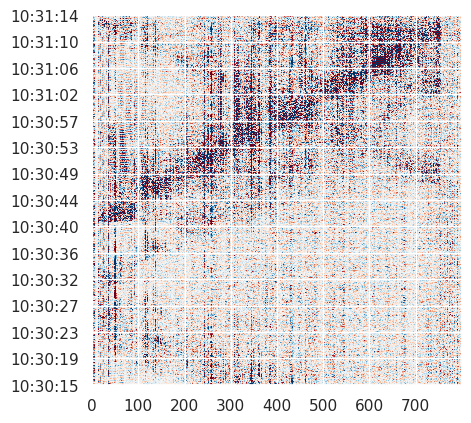

In [2]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 103015',
    # end='20230628 103115',
    duration=60
)
das.heatmap()

# 1D FFT

Welcome to Dasly!
7 files, from 104954 to 105054
Heatmap with vmin -1.57e-05, vmax 1.57e-05


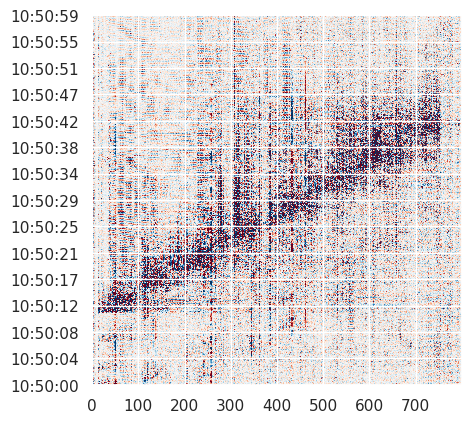

In [3]:
das = dasly.Dasly()
das.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 105000',
    # end='20230628 103115',
    duration=60
)
das.heatmap()

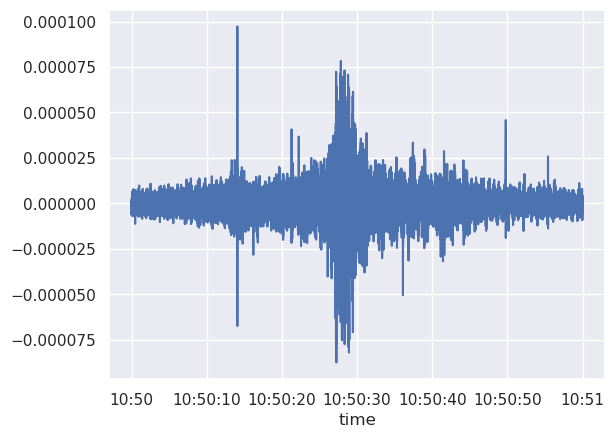

In [4]:
das.signal[400].plot();

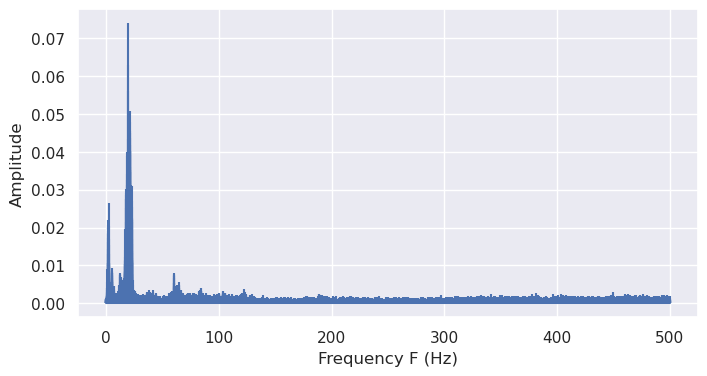

In [5]:
X = fft.fft(das.signal[400].values)
sampling_rate = 1000
freq = np.linspace(0, sampling_rate/2, round(len(X)/2) + 1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Amplitude');

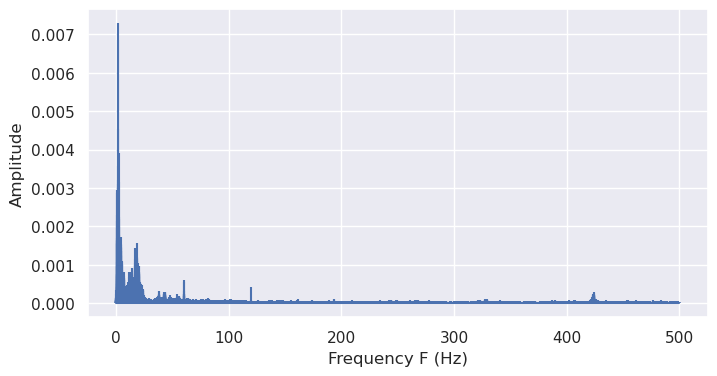

In [6]:
fft_results = np.zeros(das.signal.shape, dtype=complex)
for column_name, column_data in das.signal.items():
    column_fft = fft.fft(column_data.values)
    fft_results[:, das.signal.columns.get_loc(column_name)] = column_fft

average_fft = np.mean(fft_results, axis=1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(average_fft)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Amplitude');

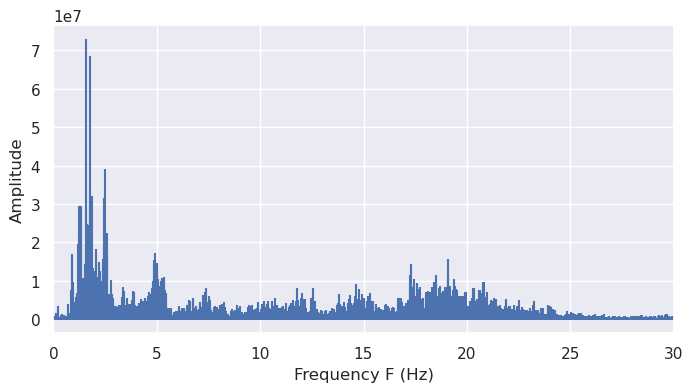

In [7]:
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(average_fft)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Amplitude');
plt.xlim(0, 30);

# Space

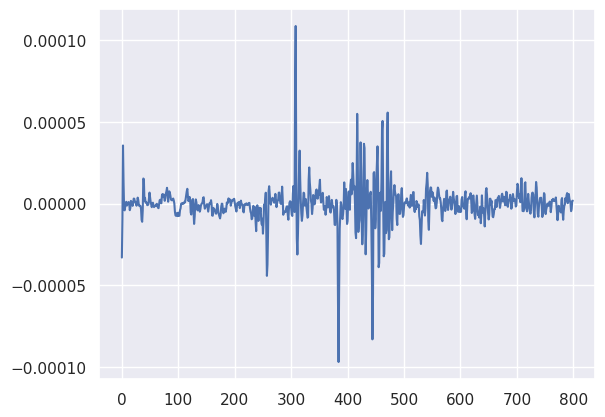

In [15]:
das.signal.transpose().iloc[:, 30000].plot();

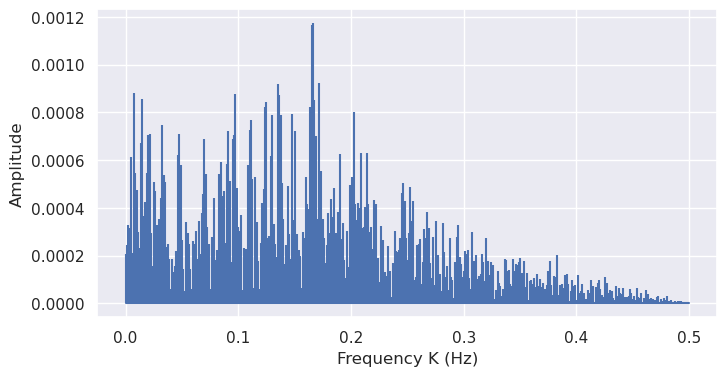

In [16]:
X = fft.fft(das.signal.transpose().iloc[:, 30000].values)
sampling_rate = 1
freq = np.linspace(0, sampling_rate/2, round(len(X)/2) + 1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(X)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency K (Hz)')
plt.ylabel('Amplitude');

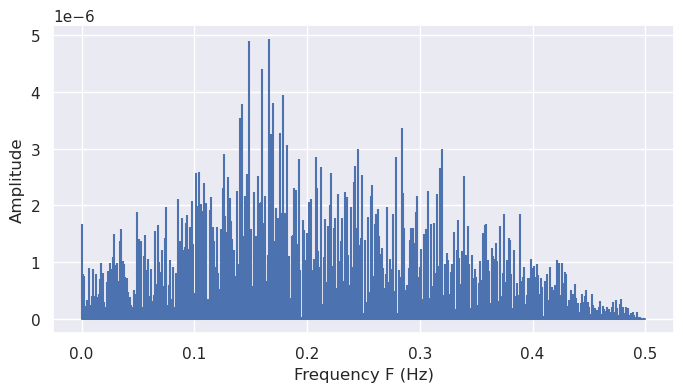

In [17]:
fft_results = np.zeros(das.signal.transpose().shape, dtype=complex)
for column_name, column_data in das.signal.transpose().items():
    column_fft = fft.fft(column_data.values)
    fft_results[:, das.signal.transpose().columns.get_loc(column_name)] = column_fft

average_fft = np.mean(fft_results, axis=1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(average_fft)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Amplitude');

# 1D FFT noise

Welcome to Dasly!
7 files, from 024954 to 025054
Heatmap with vmin -5.43e-06, vmax 5.43e-06


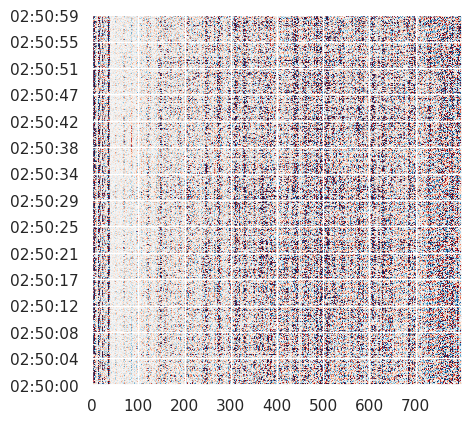

In [18]:
das_background = dasly.Dasly()
das_background.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 025000',
    # end='20230628 103115',
    duration=60
)
das_background.heatmap()

(0.0, 75000000.0)

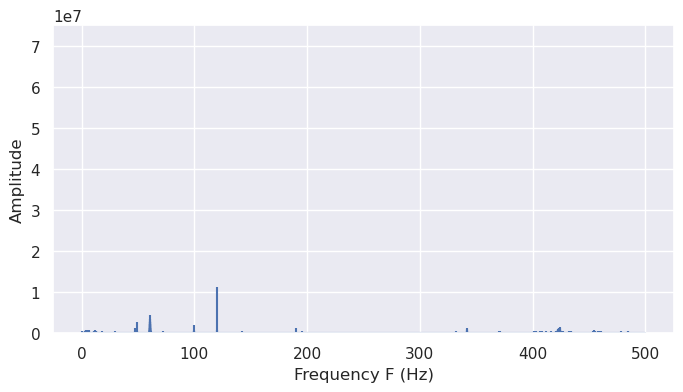

In [16]:
sampling_rate = 1000
freq = np.linspace(0, sampling_rate/2, round(len(X)/2) + 1)

fft_background = np.zeros(das_background.signal.shape, dtype=complex)
for column_name, column_data in das_background.signal.items():
    column_fft = fft.fft(column_data.values)
    fft_background[:, das_background.signal.columns.get_loc(column_name)] = column_fft

fft_background = np.mean(fft_background, axis=1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(fft_background)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency F (Hz)')
plt.ylabel('Amplitude');
plt.ylim(0, 7.5e7)

# Background noise space

(0.0, 5e-06)

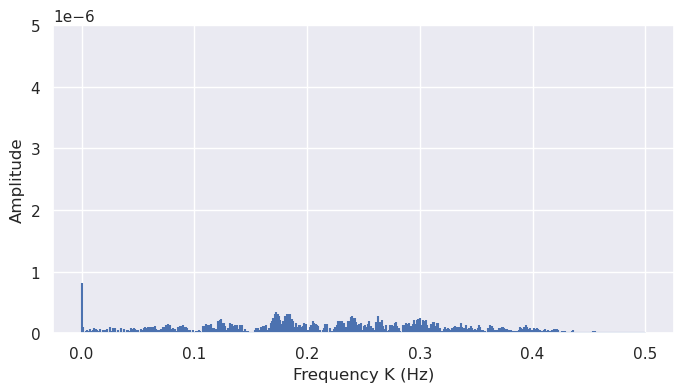

In [20]:
sampling_rate = 1
freq = np.linspace(0, sampling_rate/2, round(len(X)/2) + 1)

fft_background = np.zeros(das_background.signal.transpose().shape, dtype=complex)
for column_name, column_data in das_background.signal.transpose().items():
    column_fft = fft.fft(column_data.values)
    fft_background[:, das_background.signal.transpose().columns.get_loc(column_name)] = column_fft

fft_background = np.mean(fft_background, axis=1)
plt.figure(figsize = (8, 4))
plt.stem(freq, abs(fft_background)[0: len(freq)], 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Frequency K (Hz)')
plt.ylabel('Amplitude');
plt.ylim(0, 5e-6)

# 2D FFT

Heatmap with vmin -1.57e+05, vmax 1.57e+05


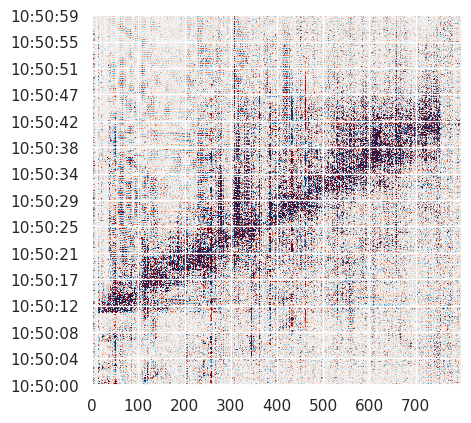

In [10]:
das.heatmap()

Heatmap with vmin 4.76e+06, vmax 2.05e+09


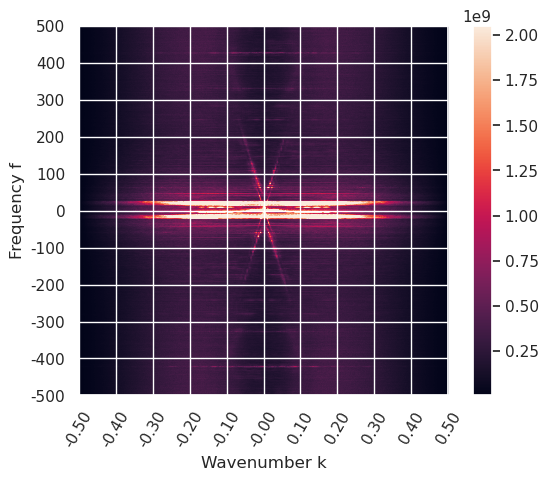

In [11]:
das.fft2d()
das.fft2d_plot(das.signal_fft)

Heatmap with vmin 5.21e+07, vmax 6.62e+09


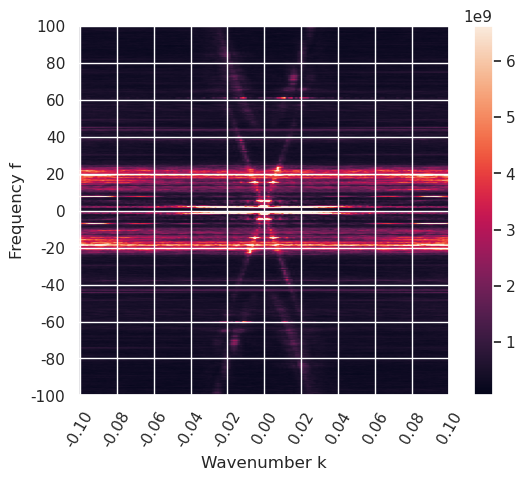

In [12]:
das.fft2d_plot(das.signal_fft.loc[-100:100, -0.1:0.1])

# 2D FFT of the other direction

Welcome to Dasly!
7 files, from 180554 to 180654
Heatmap with vmin -1.29e+05, vmax 1.29e+05


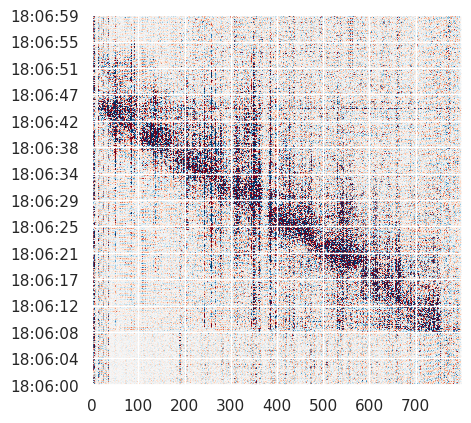

In [13]:
das_reverse = dasly.Dasly()
das_reverse.load_data(
    folder_path='/media/kptruong/yellow02/Aastfjordbrua/',
    start='20230901 180600',
    # end='20230628 103115',
    duration=60
)
das_reverse.heatmap()

Heatmap with vmin 5.23e+06, vmax 1.94e+09


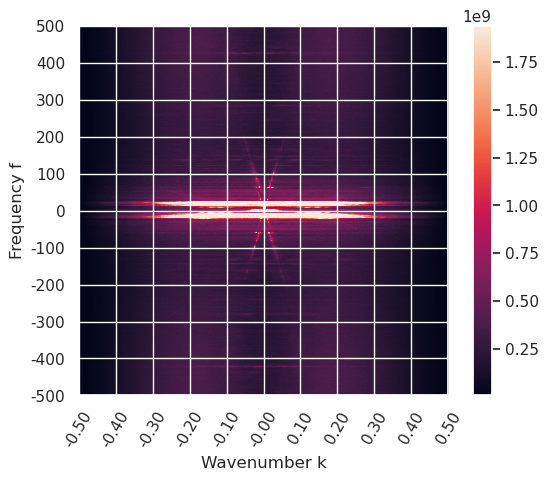

In [14]:
das_reverse.fft2d()
das_reverse.fft2d_plot(das_reverse.signal_fft)

Heatmap with vmin 5.8e+07, vmax 6.25e+09


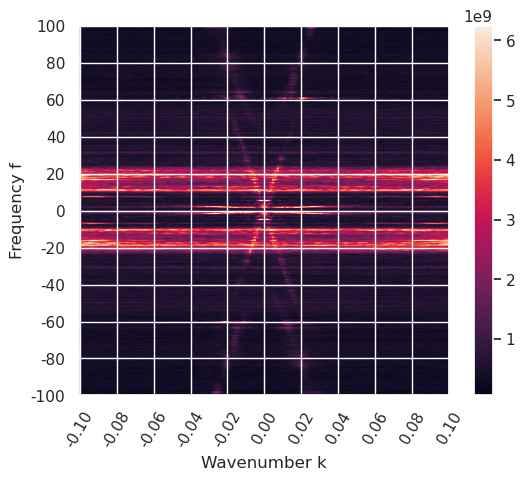

In [15]:
das_reverse.fft2d_plot(das_reverse.signal_fft.loc[-100:100, -0.1:0.1])